In [13]:
import numpy as np
from PIL import Image
from fcmeans import FCM

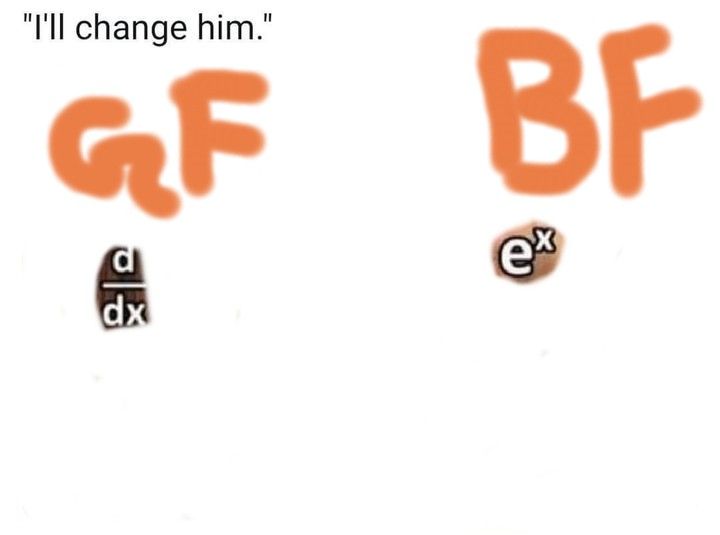

In [14]:
image = Image.open('image.jpg')
N, M = image.size                                  
image

In [44]:
print(N, M)
print(image.size)

720 535
(720, 535)


In [45]:
imgarray = np.asarray(image)
imgarray.shape

(535, 720, 3)

In [17]:
#Transforming image into a data set
X = (
    np.asarray(image)                              # convert a PIL image to np array
    .reshape((N*M, 3))                             # reshape the image to convert each pixel to an instance of a data set
)

In [46]:
print(X.shape)
X

(385200, 3)


array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [35]:
#Creating and fitting the model
fcm = FCM(n_clusters=4)                           # create a FCM instance with 10 clusters
fcm.fit(X)

In [36]:
#Pixel quantization
labeld_X = fcm.predict(X)                          # get the label of each data point
transformed_X = fcm.centers[labeld_X]              # pixel quantization into the centers
print(fcm.centers, fcm.centers.shape)

[[234.1909786  128.22166634  74.9727078 ]
 [254.80361748 254.60419513 254.44608645]
 [235.43099812 188.90857842 165.46518209]
 [ 49.20828523  38.38706935  34.3034319 ]] (4, 3)


In [37]:
print(labeld_X, labeld_X.shape)
print(transformed_X, transformed_X.shape)

[1 1 1 ... 1 1 1] (385200,)
[[254.80361748 254.60419513 254.44608645]
 [254.80361748 254.60419513 254.44608645]
 [254.80361748 254.60419513 254.44608645]
 ...
 [254.80361748 254.60419513 254.44608645]
 [254.80361748 254.60419513 254.44608645]
 [254.80361748 254.60419513 254.44608645]] (385200, 3)


In [39]:
#Converting and saving image
quatized_array = (
    transformed_X
    .astype('uint8')                               # convert data points into 8-bit unsigned integers
    .reshape((M, N, 3))                            # reshape image
)

quatized_image = Image.fromarray(np.asarray(quatized_array))   # convert array into a PIL image object
quatized_image.save('newImage_10colors.jpg') # save image


In [40]:
quatized_array.shape

(535, 720, 3)

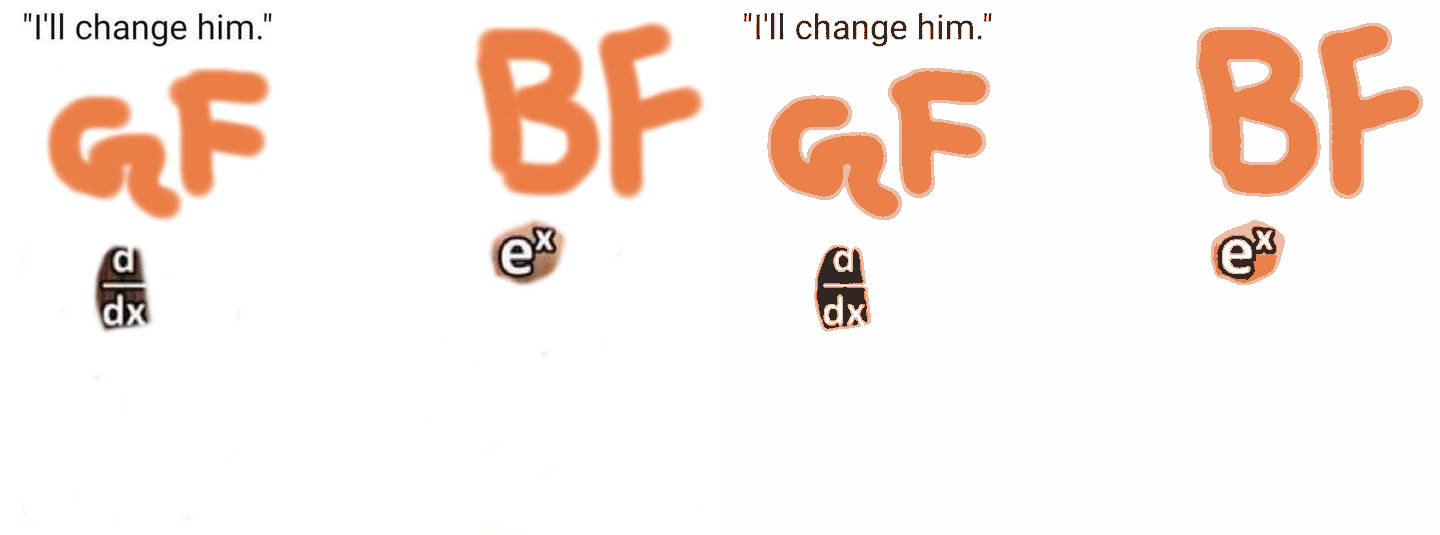

In [47]:
side_by_side = Image.fromarray(
    np.hstack([
        np.array(image),
        np.array(quatized_image)
    ])
)
side_by_side